<a href="https://colab.research.google.com/github/ynukou/AnomalyDetectionGANs/blob/main/TSAD_MTAD_GAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/mtad-gat-pytorch

/content/drive/MyDrive/mtad-gat-pytorch


In [3]:
%ls

args.py          LICENSE      prediction.py  requirements.txt         utils.py
bash_scripts/    modules.py   predict.py     result_visualizer.ipynb
datasets/        mtad_gat.py  preprocess.py  spot.py
eval_methods.py  output/      __pycache__/   training.py
licences/        plotting.py  README.md      train.py


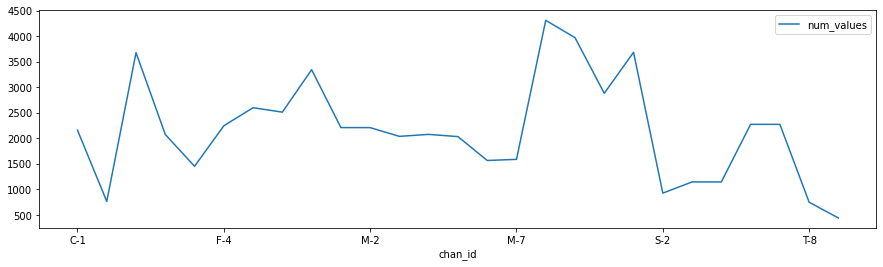

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# show csv
def visualize_timeserie(serie: pd.DataFrame, legend:bool = False) -> None:
    fig, ax = plt.subplots(figsize=(15, 4))
    serie.plot(ax=ax, legend=legend)
    if legend:
        plt.legend()
    plt.show()


DATA_PATH = '/content/drive/MyDrive/mtad-gat-pytorch/datasets/data/msl_train_md.csv'

temp = pd.read_csv(
    DATA_PATH, 
    parse_dates=True, 
    index_col='chan_id'
)

#print(temp.head())

visualize_timeserie(temp,True)

In [5]:
# 导入模块
import numpy as np
import pandas as pd
 
# path处填入npy文件具体路径
npfile = np.load("/content/drive/MyDrive/mtad-gat-pytorch/datasets/data/train/A-2.npy")
# 将npy文件的数据格式转化为csv格式
np_to_csv = pd.DataFrame(data=npfile)
# 存入具体目录下的np_to_csv.csv 文件
np_to_csv.to_csv('/content/drive/MyDrive/mtad-gat-pytorch/datasets/social_attn.csv')



In [6]:
%cat README.md

Our implementation of MTAD-GAT: Multivariate Time-series Anomaly Detection (MTAD) via Graph Attention Networks (GAT) by [Zhao et al. (2020)](https://arxiv.org/pdf/2009.02040.pdf).

- This repo includes a complete framework for multivariate anomaly detection, using a model that is heavily inspired by MTAD-GAT.
- Our work does not serve to reproduce the original results in the paper.
- :email: For contact, feel free to use axel.harstad@gmail.com

## :exclamation: Key Notes
- By default we use the recently proposed [*GATv2*](https://arxiv.org/abs/2105.14491), but include the option to use the standard GAT
- Instead of using a Variational Auto-Encoder (VAE) as the Reconstruction Model, we use a GRU-based decoder. 
- We provide implementations of the following thresholding methods, but their parameters should be customized to different datasets:
  - peaks-over-threshold (POT) as in the MTAD-GAT paper
  - thresholding method proposed by [Hundman et. al.](https://arxiv.org/abs/1802.04431)
  -

In [7]:
%cd datasets

/content/drive/MyDrive/mtad-gat-pytorch/datasets


In [8]:
!wget https://s3-us-west-2.amazonaws.com/telemanom/data.zip && unzip data.zip && rm data.zip

--2022-06-23 07:51:30--  https://s3-us-west-2.amazonaws.com/telemanom/data.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.197.0
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.197.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85899803 (82M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  81.92M  24.6MB/s    in 3.8s    

2022-06-23 07:51:34 (21.7 MB/s) - ‘data.zip’ saved [85899803/85899803]

Archive:  data.zip
   creating: data/2018-05-19_15.00.10/
   creating: data/2018-05-19_15.00.10/models/
  inflating: data/2018-05-19_15.00.10/models/A-1.h5  
  inflating: data/2018-05-19_15.00.10/models/A-2.h5  
  inflating: data/2018-05-19_15.00.10/models/A-3.h5  
  inflating: data/2018-05-19_15.00.10/models/A-4.h5  
  inflating: data/2018-05-19_15.00.10/models/A-5.h5  
  inflating: data/2018-05-19_15.00.10/models/A-6.h5  
  inflating: data/2018-05-19_15.00.10/models/

In [9]:
%cd data

/content/drive/MyDrive/mtad-gat-pytorch/datasets/data


In [10]:
!wget https://raw.githubusercontent.com/khundman/telemanom/master/labeled_anomalies.csv

--2022-06-23 07:53:16--  https://raw.githubusercontent.com/khundman/telemanom/master/labeled_anomalies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3956 (3.9K) [text/plain]
Saving to: ‘labeled_anomalies.csv.1’

labeled_anomalies.c 100%[===================>]   3.86K  --.-KB/s    in 0.001s  

2022-06-23 07:53:16 (4.20 MB/s) - ‘labeled_anomalies.csv.1’ saved [3956/3956]



In [11]:
!rm -rf 2018-05-19_15.00.10

In [12]:
%cd ..
%cd ..

/content/drive/MyDrive/mtad-gat-pytorch/datasets
/content/drive/MyDrive/mtad-gat-pytorch


In [13]:
%ls

args.py          LICENSE      prediction.py  requirements.txt         utils.py
bash_scripts/    modules.py   predict.py     result_visualizer.ipynb
datasets/        mtad_gat.py  preprocess.py  spot.py
eval_methods.py  output/      __pycache__/   training.py
licences/        plotting.py  README.md      train.py


In [14]:
!python preprocess.py --dataset MSL

MSL test_label (73729,)
MSL train (58317, 55)
MSL test (73729, 55)


In [15]:
!python train.py --dataset MSL

{'dataset': 'MSL', 'group': '1-1', 'lookback': 100, 'normalize': True, 'spec_res': False, 'kernel_size': 7, 'use_gatv2': True, 'feat_gat_embed_dim': None, 'time_gat_embed_dim': None, 'gru_n_layers': 1, 'gru_hid_dim': 150, 'fc_n_layers': 3, 'fc_hid_dim': 150, 'recon_n_layers': 1, 'recon_hid_dim': 150, 'alpha': 0.2, 'epochs': 30, 'val_split': 0.1, 'bs': 256, 'init_lr': 0.0001, 'shuffle_dataset': True, 'dropout': 0.3, 'use_cuda': True, 'print_every': 1, 'log_tensorboard': True, 'scale_scores': False, 'use_mov_av': False, 'gamma': 1, 'level': None, 'q': None, 'dynamic_pot': False, 'comment': ''}
load data of: MSL
train:  0 None
test:  0 None
Data normalized
Data normalized
train set shape:  (58317, 55)
test set shape:  (73729, 55)
test set label shape:  (73729,)
111111111111111
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False Fa